In [1]:
from scipy.stats import ttest_1samp
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
df = pd.read_csv('E:/GB/Analitic Atestatia/ab_stats.csv')


In [6]:
df.head(10)

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814
5,0.0,0,0,A,9.578727
6,0.0,0,0,A,6.162601
7,0.0,0,0,A,11.909452
8,0.0,0,0,A,6.540910
9,0.0,0,0,A,7.990794


### Смотрим информацию о типе и количестве данных

In [7]:
df.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


### Проверяем на нулевые значения

In [8]:
df.isna().sum()

revenue          0
num_purchases    0
purchase         0
ab_group         0
av_site visit    0
dtype: int64

### Проверяем размер групп

In [10]:
df.ab_group.value_counts()

A    11835
B    11817
Name: ab_group, dtype: int64

### Посмотрим на группы отдельно

In [12]:
df[df['ab_group']=='A'].describe()

,revenue,num_purchases,purchase,av_site visit
count,11835.000000,11835.000000,11835.000000,11835.000000
mean,0.404462,0.050697,0.021631,6.974724
std,13.133218,1.467511,0.145481,2.023533
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.656155
50%,0.000000,0.000000,0.000000,6.982329
75%,0.000000,0.000000,0.000000,8.345572
max,1303.609284,152.000000,1.000000,17.728836


In [13]:
df[df['ab_group']=='B'].describe()

,revenue,num_purchases,purchase,av_site visit
count,11817.000000,11817.000000,11817.000000,11817.000000
mean,0.244794,0.036473,0.019802,7.051559
std,3.176534,0.418480,0.139325,3.976799
min,0.000000,0.000000,0.000000,-8.286822
25%,0.000000,0.000000,0.000000,4.380984
50%,0.000000,0.000000,0.000000,7.060873
75%,0.000000,0.000000,0.000000,9.768648
max,113.830000,25.000000,1.000000,22.446822


#### Пока мы еще ничего не посчитали, но уже можно заметить, что максимальный чек в первой группе сильно больше, чем в группе B. Все мы знаем, что среднее очень неустойчиво к выбросам, так что нам необходимо будет это учесть.

### Проверка на нормальность распределения и применение статистических критериев

#### Метрика визиты на юзера

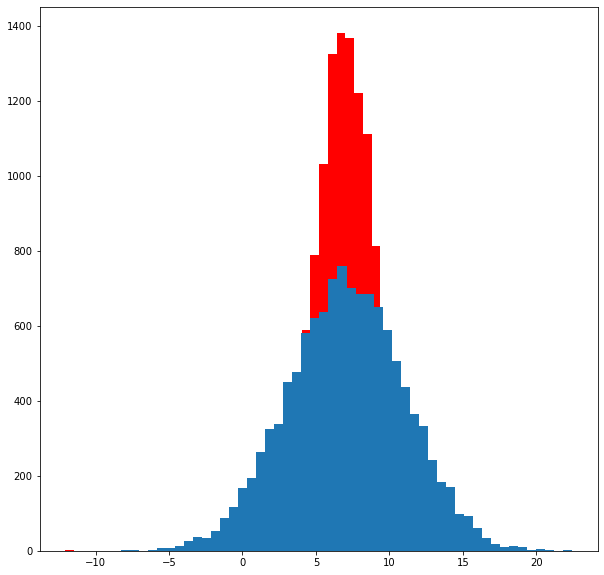

In [14]:
plt.figure(figsize=(10, 10))
control_visit_all = df['av_site visit'][df['ab_group'] == 'A']
test_visit_all = df['av_site visit'][df['ab_group'] == 'B']


plt.hist(control_visit_all, color='r', bins=50)
plt.hist(test_visit_all,  bins=50)


plt.show()

In [26]:
import scipy.stats as stats
from statsmodels.stats import proportion

In [21]:
stats.ttest_ind(control_visit_all, test_visit_all, equal_var = False)

Ttest_indResult(statistic=-1.872183970103851, pvalue=0.06119777801292236)

### Метрика доля юзеров с покупкой

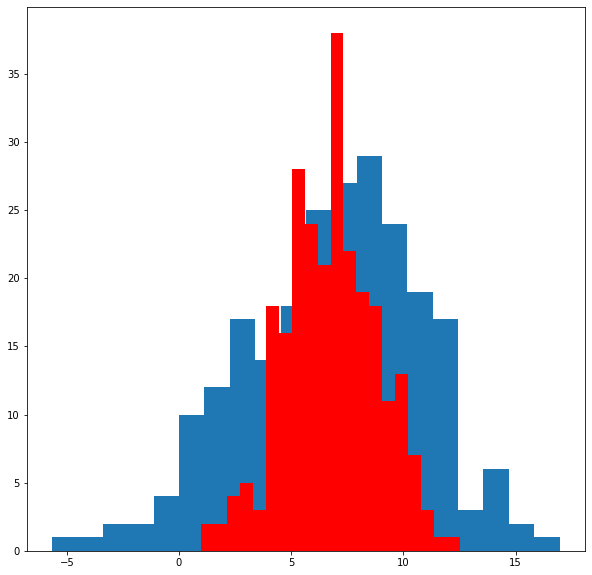

In [23]:
plt.figure(figsize=(10, 10))
control_visit = df['av_site visit'][(df['ab_group'] == 'A')&(df['purchase'] == 1)]
test_visit =df['av_site visit'][(df['ab_group'] == 'B')&(df['purchase'] == 1)]
plt.hist(test_visit,  bins=20)
plt.hist(control_visit, color='r', bins=20)

plt.show()

In [25]:
df['purchase'].value_counts()

0    23162
1      490
Name: purchase, dtype: int64

In [27]:
k1 = df[df['ab_group']=='A']['purchase'].sum()
k2 = df[df['ab_group']=='B']['purchase'].sum()

In [28]:
n1 = df[df['ab_group']=='A'].shape[0]
n2 = df[df['ab_group']=='B'].shape[0]

In [29]:
z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), 
                                                   np.array([n1, n2]))
print('Results are ','z_score =%.3f, pvalue = %.3f'%(z_score, z_pvalue))

Results are  z_score =0.987, pvalue = 0.323


In [30]:
if abs(z_pvalue) < 0.05:
    print("We may reject the null hypothesis!")
else:
    print("We have failed to reject the null hypothesis")

We have failed to reject the null hypothesis


### Непараметрический Хи-квадрат

In [31]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), 
                                                   np.array([n1, n2]))

print('Results are ','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq =0.975, pvalue = 0.323


In [32]:
if abs(pvalue) < 0.05:
    print("We may reject the null hypothesis!")
else:
    print("We have failed to reject the null hypothesis")

We have failed to reject the null hypothesis


### Метрика arpu

#### Непараметрический критерий  Манн-Уитни

In [33]:
df.groupby('ab_group')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ab_group,,,,,,,,
A,11835.0,0.404462,13.133218,0.0,0.0,0.0,0.0,1303.609284
B,11817.0,0.244794,3.176534,0.0,0.0,0.0,0.0,113.830000


In [35]:
mw_stats = stats.mannwhitneyu(x=df[(df['ab_group'] == 'A')&(df['purchase'] == 1)]['revenue'].values,
                                                  y=df[(df['ab_group'] == 'B')&(df['purchase'] == 1)]['revenue'].values)
mw_stats

MannwhitneyuResult(statistic=29729.5, pvalue=0.8871956616344514)

#### при alpha = 0.05 pvalue > alpha, значит статистических различий нет

#### Проверим статистическую мощность нашего теста


In [37]:
C_mean = control_visit_all.values.mean()
T_mean = test_visit_all.values.mean()

C_std = control_visit_all.values.std()
T_std = test_visit_all.values.std()

n =  len(control_visit_all.values)

In [38]:
S = np.sqrt((T_std**2 + C_std **2)/ 2)

In [39]:
ef =float((T_mean-C_mean)/ S) 

In [40]:
from statsmodels.stats.power import TTestIndPower

In [41]:
alpha = 0.05

analysis = TTestIndPower()
result = analysis.solve_power(ef, power=None,
nobs1=n, ratio=1.0, alpha=alpha)

result

0.4655402651240802

### Вывод:
#### Статистической разницы между группами нет. Изменения не дают лучший результат
